<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/CNN_10Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM   
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from keras import callbacks 
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 


In [3]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    
train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Trai cay',
                                                 shuffle=True,
                                                 target_size=(100, 100), 
                                                 subset="training",
                                                 class_mode='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Trai cay',
                                                 shuffle=True,
                                                 target_size=(100, 100), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 619 images belonging to 10 classes.
Found 151 images belonging to 10 classes.


In [4]:
def create_label(x,num):
    for i in x:   
        image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
        target_size = (100,100))
        image=np.array(image)
        data.append(image)
        labels.append(num)

In [5]:
import glob
Mangosteen = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/Mangosteen/*.*')
apple = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/apple/*.*')
avocado = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/avocado/*.*')
banana = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/banana/*.*')
kiwi = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/kiwi/*.*')
grape = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/grape/*.*')
lemon = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/lemon/*.*')
orange = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/orange/*.*')
papaya = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/papaya/*.*')
pineapple = glob.glob('/content/drive/MyDrive/Colab Notebooks/Trai cay/pineapple/*.*')

data = []
labels = []
    
create_label(Mangosteen,0)
create_label(apple,1)
create_label(avocado,2)
create_label(banana,3)
create_label(kiwi,4)
create_label(grape,5)
create_label(lemon,6)
create_label(orange,7)
create_label(papaya,8)
create_label(pineapple,9)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=42)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [8]:
# Huận luyện mô hình 
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 200, batch_size = 256,validation_data = (x_test,y_test) , verbose = 1)

Epoch 1/200
3/3 [==============================] - 18s 1s/step - loss: 238.4770 - accuracy: 0.1023 - val_loss: 0.1049 - val_accuracy: 0.0779
Epoch 2/200
3/3 [==============================] - 1s 187ms/step - loss: 0.1178 - accuracy: 0.2305 - val_loss: 0.0775 - val_accuracy: 0.5909
Epoch 3/200
3/3 [==============================] - 1s 189ms/step - loss: 0.0655 - accuracy: 0.6494 - val_loss: 0.0591 - val_accuracy: 0.6753
Epoch 4/200
3/3 [==============================] - 1s 184ms/step - loss: 0.0527 - accuracy: 0.6932 - val_loss: 0.0535 - val_accuracy: 0.6104
Epoch 5/200
3/3 [==============================] - 1s 181ms/step - loss: 0.0479 - accuracy: 0.6705 - val_loss: 0.0549 - val_accuracy: 0.6688
Epoch 6/200
3/3 [==============================] - 1s 184ms/step - loss: 0.0451 - accuracy: 0.6997 - val_loss: 0.0460 - val_accuracy: 0.6429
Epoch 7/200
3/3 [==============================] - 1s 185ms/step - loss: 0.0401 - accuracy: 0.7045 - val_loss: 0.0489 - val_accuracy: 0.6623
Epoch 8/200
3

In [9]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss =', score[0])
print('Test accuracy =', score[1])

Test loss = 0.019526593387126923
Test accuracy = 0.9155844449996948


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

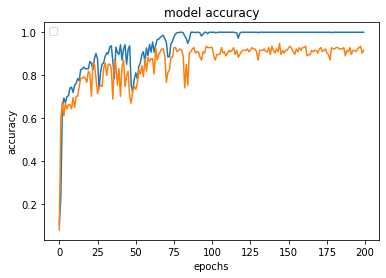

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('train', 'validation', loc = 'upper left')
plt.show()

In [11]:
from tensorflow.keras.models import load_model
model.save('Fruit.h5')
model_CNN = load_model('Fruit.h5')

array(['Kiwi'], dtype='<U10')

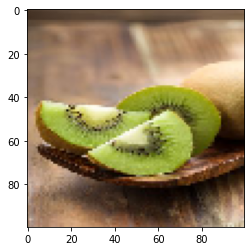

In [28]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/Colab Notebooks/Trai cay/kiwi/6d08540465c57459b068b379087b845c.jpg"

predict = ['Mangosteen','Apple','Avocado','Banana','Kiwi','Grape','Lenmon','Orange','Papaya','Pineapple']
predict = np.array(predict)
img = load_img(filename,target_size=(100,100))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_CNN.predict(img),axis=-1)
predict[result]

array(['Apple'], dtype='<U10')

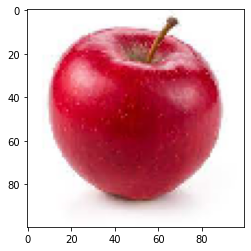

In [31]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/apple.jpg"

predict = ['Mangosteen','Apple','Avocado','Banana','Kiwi','Grape','Lenmon','Orange','Papaya','Pineapple']
predict = np.array(predict)
img = load_img(filename,target_size=(100,100))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_CNN.predict(img),axis=-1)
predict[result]